## Наконец-то модели! Не(большое) предисловие.

### Ввод основных понятий, связанных непосредственно с машинным обучением:

1. Вид обучения модели
2. Задача модели
3. Метрика оценки модели

#### Вид обучения

Перед тем как перейти к рассмотрению задач, решаемых моделями машинного обучения, стоит рассмотреть сначала виды обучения модели, так как от этого зависит как класс задач, так и выбор модели. Различают несколько видов обучения:

* Обучение с учителем (Supervised Learning)
* Обучение без учителя (Unsupervised Learning)
* Обучение с подкреплением (Reinforcement Learning)

В задачах **обучения без учителя** имеется выборка, состоящая из объектов, описываемых набором признаков. В задачах **обучения с учителем** вдобавок к этому для каждого объекта некоторой выборки, называемой обучающей, известен целевой признак – по сути это то, что хотелось бы прогнозировать для прочих объектов, не из обучающей выборки. **Обучение с подкреплением** представляет собой такой принцип, согласно которому модель обучается что-то делать, взаимодействуя с некоторой средой, которая может определенным образом реагировать на поведение этой модели. 

#### Задачи 

Разобравшись с видами обучений, можем вспомнить самые популярные виды задач машинного обучения:

* Классификация - отнесение объекта к одному из определенных классов на основании его признаков. Различают бинарную, не
  бинарную, многомерную (и все производные от них) классификации.
* Регрессия - задача прогнозирования количественного признака объекта с учетом других его признаков.
* Кластеризация - разбиение всего множества объектов на различные группы по значениям признаков таким образом, что внутри одной группы объекты схожи между собой, а вне одной группы - различны.
* Детекция аномалий - поиск объектов, существенно не похожих на все остальные в выборке, либо на какую-то группу объектов.
* Другие (см. источники лекций, там есть пара книжек, описывающих самые разные задачи, решаемые машинным обучением)

Задачи классификации и регрессии - это задачи обучения с учителем. Хорошим примером задачи регрессии можно назвать
задачу кредитного скоринга: на основе накопленных кредитной организацией данных о своих клиентах хочется прогнозировать
возможность невозврата кредита. Здесь обучающая выборка: набор объектов (людей), каждый из
которых характеризуется набором признаков (таких как возраст, зарплата, тип кредита, невозвраты в прошлом и т.д.), а
также целевым признаком. Если этот целевой признак – просто факт невозврата кредита (1 или 0, т.е. банк знает о своих
клиентах, кто вернул кредит, а кто – нет), то это задача (бинарной) классификации. Если известно, на сколько по времени
клиент затянул с возвратом кредита и хочется то же самое прогнозировать для новых клиентов, то это будет задачей
регрессии.

### Метрики качества моделей

Наконец, третья абстракция в определении машинного обучения – это метрика оценки производительности (качества) алгоритма
(модели). Такие метрики различаются для разных задач и алгоритмов, и про них лучше говорить по мере изучения того или
иного алгоритма. Достаточно пока что знать, что самая простая метрика качества, решающего задачу классификации – это
доля правильных ответов (*accuracy*, но не следует называть ее **точностью**, этот перевод определяет другую метрику, *precision*)
– то есть попросту доля верных прогнозов алгоритма на тестовой выборке.

Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — confusion matrix (матрица ошибок).
Допустим, что у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из классов, тогда матрица ошибок классификации будет выглядеть следующим образом:

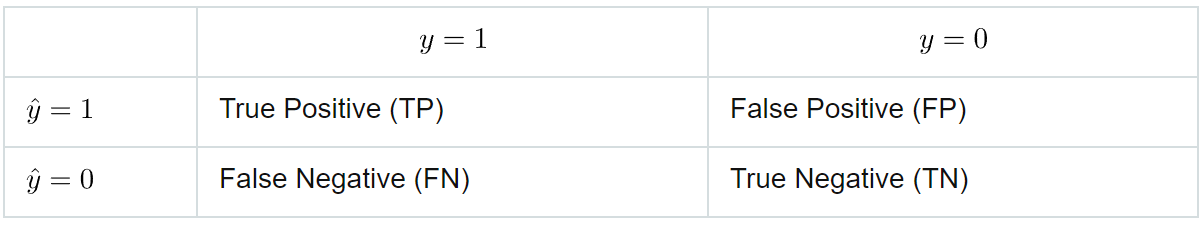

Здесь $\hat y$ — это ответ алгоритма на объекте, а $y$ — истинная метка класса на этом объекте.
Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

#### Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является accuracy — доля правильных ответов алгоритма:

$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$



Эта метрика бесполезна в задачах с неравными классами, и это легко показать на примере.


Допустим, мы хотим оценить работу спам-фильтра почты. У нас есть 100 не-спам писем, 90 из которых наш классификатор определил верно (True Negative = 90, False Positive = 10), и 10 спам-писем, 5 из которых классификатор также определил верно (True Positive = 5, False Negative = 5).
Тогда **accuracy**:


$$\ accuracy = \frac{5 + 90}{5 + 90 + 10 + 5} = 86,4% $$


Однако если мы просто будем предсказывать все письма как не-спам, то получим более высокую accuracy:


$$\ accuracy = \frac{0 + 100}{0 + 100 + 0 + 10} = 90,9% $$


При этом, наша модель совершенно не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.

#### Precision, recall и F-мера

Для оценки качества работы алгоритма на каждом из классов по отдельности введем метрики precision (точность) и recall (полнота).


$$ \large precision = \frac{TP}{TP + FP}$$


$$ \large recall = \frac{TP}{TP + FN} $$


Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

#### Как с ними работать

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Как мы отмечали ранее, ошибки классификации бывают двух видов: False Positive и False Negative. В статистике первый вид ошибок называют **ошибкой I-го рода**, а второй — **ошибкой II-го рода**. В нашей задаче по определению оттока абонентов, ошибкой первого рода будет принятие лояльного абонента за уходящего, так как наша нулевая гипотеза состоит в том, что никто из абонентов не уходит, а мы эту гипотезу отвергаем. Соответственно, ошибкой второго рода будет являться "пропуск" уходящего абонента и ошибочное принятие нулевой гипотезы.


Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.
Часто в реальной практике стоит задача найти оптимальный (для заказчика) баланс между этими двумя метриками. Классическим примером является задача определения оттока клиентов.
Очевидно, что мы не можем находить всех уходящих в отток клиентов и только их. Но, определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдет с большей вероятностью, так как мы ограничены в ресурсах колл-центра.



Обычно при оптимизации гиперпараметров алгоритма (например, в случае перебора по сетке GridSearchCV ) используется одна метрика, улучшение которой мы и ожидаем увидеть на тестовой выборке.
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. **F-мера** (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :



$$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$$


$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$)
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.
В sklearn есть удобная функция _metrics.classificationreport, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.

## Встречайте: дерево решений!

Начнем обзор методов классификации и регрессии с одного из самых популярных – с дерева решений. Деревья решений используются в повседневной жизни в самых разных областях человеческой деятельности, порой и очень далеких от машинного обучения. Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации. Приведем пример из области консультирования научных сотрудников института. Высшая Школа Экономики выпускает инфо-схемы, облегчающие жизнь своим сотрудникам. Вот фрагмент инструкции по публикации научной статьи на портале института.

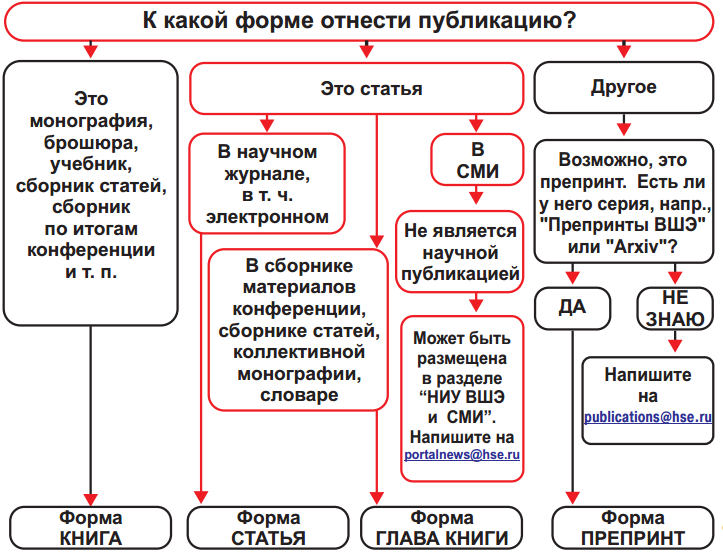


В терминах машинного обучения можно сказать, что это элементарный классификатор, который определяет форму публикации на портале (книга, статья, глава книги, препринт, публикация в "НИУ ВШЭ и СМИ") по нескольким признакам: типу публикации (монография, брошюра, статья и т.д.), типу издания, где опубликована статья (научный журнал, сборник трудов и т.д.) и остальным.

Зачастую дерево решений служит обобщением опыта экспертов, средством передачи знаний будущим сотрудникам или моделью бизнес-процесса компании. Например, до внедрения масштабируемых алгоритмов машинного обучения в банковской сфере задача кредитного скоринга решалась экспертами. Решение о выдаче кредита заемщику принималось на основе некоторых интуитивно (или по опыту) выведенных правил, которые можно представить в виде дерева решений.

В этом случае можно сказать, что решается задача бинарной классификации (целевой класс имеет два значения: "Выдать кредит" и "Отказать") по признакам "Возраст", "Наличие дома", "Доход" и "Образование".

Дерево решений как алгоритм машинного обучения – по сути то же самое: объединение логических правил вида "Значение признака $a$ меньше $x$ И Значение признака $b$ меньше $y$… => Класс 1" в структуру данных "Дерево". Огромное преимущество деревьев решений в том, что они легко интерпретируемы, понятны человеку. Например, по схеме на рисунке выше можно объяснить заемщику, почему ему было отказано в кредите. Скажем, потому, что у него нет дома и доход меньше 5000. Как мы увидим дальше, многие другие, хоть и более точные, модели не обладают этим свойством и могут рассматриваться скорее как "черный ящик", в который загрузили данные и получили ответ.

### Как строится дерево решений

В примере с кредитным скорингом мы видели, что решение о выдаче кредита принималось на основе возраста, наличия недвижимости, дохода и других. Но какой признак выбрать первым? Для этого рассмотрим пример попроще, где все признаки бинарные.


Здесь можно вспомнить игру "20 вопросов", которая часто упоминается во введении в деревья решений. Наверняка каждый в нее играл. Один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить "Да" или "Нет" (опустим варианты "не знаю" и "не могу сказать"). Какой вопрос отгадывающий задаст первым делом? Конечно, такой, который сильнее всего уменьшит количество оставшихся вариантов. К примеру, вопрос "Это Анджелина Джоли?" в случае отрицательного ответа оставит более 7 миллиардов вариантов для дальнейшего перебора (конечно, поменьше, не каждый человек – знаменитость, но все равно немало), а вот вопрос "Это женщина?" отсечет уже около половины знаменитостей. То есть, признак "пол" намного лучше разделяет выборку людей, чем признак "это Анджелина Джоли", "национальность-испанец" или "любит футбол". Это интуитивно соответствует понятию прироста информации, основанного на энтропии.

### Энтропия

Энтропия Шеннона определяется для системы с $N$ возможными состояниями следующим образом:


$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$


где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения (комбинаторные и теоретико-информационные) этого понятия, отметим, что, интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. Это поможет нам формализовать "эффективное разделение выборки", про которое мы говорили в контексте игры "20 вопросов".

### Пример с шариками

Для иллюстрации того, как энтропия поможет определить хорошие признаки для построения дерева, приведем тот же игрушечный пример, что в статье "Энтропия и деревья принятия решений". Будем предсказывать цвет шарика по его координате. Конечно, ничего общего с жизнью это не имеет, но позволяет показать, как энтропия используется для построения дерева решений.

![Шарики](balls/1.png)

Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью $p_1=\frac{9}{20}$ будет синим и с вероятностью $p_2=\frac{11}{20}$ – желтым. Значит, энтропия состояния $$S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$$ Само это значение пока ни о чем нам не говорит. Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы – с координатой меньше либо равной 12 и больше 12.

![Шарики](balls/2.png)

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна $$S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$$ В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна $$S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$$ Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно.

Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации. Формально прирост информации (information gain, IG) при разбиении выборки по признаку $Q$ (в нашем примере это признак "$x \leq 12$") определяется как

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$


где $q$ – число групп после разбиения, $N_i$ – число элементов выборки, у которых признак $Q$ имеет $i$-ое значение. В нашем случае после разделения получилось две группы ($q = 2$) – одна из 13 элементов ($N_1 = 13$), вторая – из 7 ($N_2 = 7$). Прирост информации получился

$$ \Large IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$

Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

![Шарики](balls/3.png)

Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше либо равна 18", для левой – еще три. Очевидно, энтропия группы с шариками одного цвета равна 0 ($\log_2{1} = 0$), что соответствует представлению, что группа шариков одного цвета – упорядоченная.
В итоге мы построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом "вопросов", или разделений, пусть даже оно и не идеально разбивает по цветам обучающую выборку. Эту проблему, переобучение, мы еще рассмотрим далее.



### Другие критерии качества разбиения в задаче классификации



Мы разобрались в том, как понятие энтропии позволяет формализовать представление о качестве разбиения в дереве. Но это всего лишь эвристика, существуют и другие:

* Неопределенность Джини (Gini impurity): $$G = 1 - \sum\limits_k (p_k)^2$$ Максимизацию этого критерия можно интерпретировать как максимизацию числа пар объектов одного класса, оказавшихся в одном поддереве. Подробнее об этом (как и обо многом другом) можно узнать из репозитория Евгения Соколова. Не путать с индексом Джини! Подробнее об этой путанице – в блогпосте Александра Дьяконова
* Ошибка классификации (misclassification error): $E = 1 - \max\limits_k p_k$


На практике ошибка классификации почти не используется, а неопределенность Джини и прирост информации работают почти одинаково.

В случае задачи бинарной классификации ($p_+$ – вероятность объекта иметь метку +) энтропия и неопределенность Джини примут следующий вид:

$$ S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})};$$
$$ G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+) $$

### Пример

Рассмотрим пример применения дерева решений из библиотеки Scikit-learn для синтетических данных. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# первый класс
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

Отобразим данные. Неформально, задача классификации в этом случае – построить какую-то "хорошую" границу, разделяющую 2 класса (красные точки от желтых). Если утрировать, то машинное обучение в этом случае сводится к тому, как выбрать хорошую разделяющую границу. Возможно, прямая будет слишком простой границей, а какая-то сложная кривая, огибающая каждую красную точку – будет слишком сложной и будем много ошибаться на новых примерах из того же распределения, из которого пришла обучающая выборка. Интуиция подсказывает, что хорошо на новых данных будет работать какая-то гладкая граница, разделяющая 2 класса, или хотя бы просто прямая (в $n$-мерном случае – гиперплоскость).

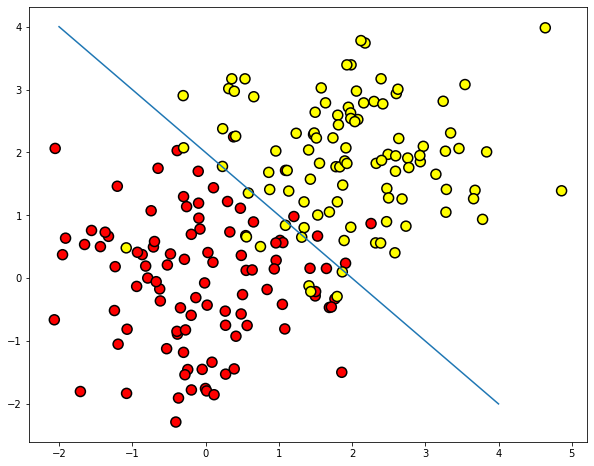

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

Попробуем разделить эти два класса, обучив дерево решений. В дереве будем использовать параметр max_depth, ограничивающий глубину дерева. Визуализируем полученную границу разделения классов.

In [4]:
from sklearn.tree import DecisionTreeClassifier

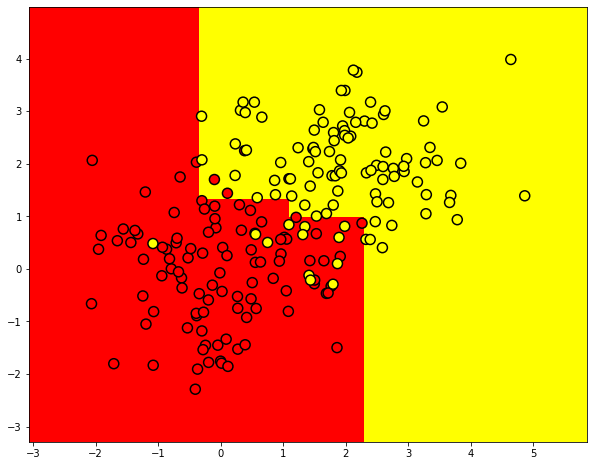

In [5]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)

А как выглядит само построенное дерево? Видим, что дерево "нарезает" пространство на несколько прямоугольников (равное
количеству листьев в дереве). В каждом таком прямоугольнике прогноз дерева будет константным, по превалированию объектов
того или иного класса.

In [6]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'small_tree.dot' -o 'small_tree.png'

![Деревце](small_tree.png)

### Как дерево решений работает с количественными признаками

Допустим, в выборке имеется количественный признак "Возраст", имеющий много уникальных значений. Дерево решений будет искать лучшее (по критерию типа прироста информации) разбиение выборки, проверяя бинарные признаки типа "Возраст < 17", "Возраст < 22.87" и т.д. Но что если таких "нарезаний" возраста слишком много? А что если есть еще количественный признак "Зарплата", и зарплату тоже можно "нарезать" большим числом способов? Получается слишком много бинарных признаков для выбора лучшего на каждом шаге построения дерева. Для решения этой проблемы применяют эвристики для ограничения числа порогов, с которыми мы сравниваем количественный признак.

Рассмотрим это на игрушечном примере. Пусть имеется следующая выборка:



In [7]:
import pandas as pd

In [8]:
data = pd.DataFrame({"Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
                     "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})

In [9]:
data

,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


Отсортируем ее по возрастанию возраста.



In [10]:
some_data = data.sort_values("Возраст")

In [11]:
some_data

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [12]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(some_data['Возраст'].values.reshape(-1, 1), some_data['Невозврат кредита'].values)

export_graphviz(age_tree, feature_names=['Возраст'], 
out_file='age_tree.dot', filled=True)
!dot -Tpng 'age_tree.dot' -o 'age_tree.png'

![Деревце](age_tree.png)

Обучим на этих данных дерево решений (без ограничения глубины) и посмотрим на него.


На картинке ниже видим, что дерево задействовало 5 значений, с которыми сравнивается возраст: 43.5, 19, 22.5, 30 и 32 года. Если приглядеться, то это аккурат средние значения между возрастами, при которых целевой класс "меняется" с 1 на 0 или наоборот. Сложная фраза, поэтому пример: 43.5 – это среднее между 38 и 49 годами, клиент, которому 38 лет не вернул кредит, а тот, которому 49 – вернул. Аналогично, 19 лет – среднее между 18 и 20 годами. То есть в качестве порогов для "нарезания" количественного признака, дерево "смотрит" на те значения, при которых целевой класс меняет свое значение.



Рассмотрим пример посложнее: добавим признак "Зарплата" (тыс. рублей/месяц).

In [13]:
data['Зарплата'] = [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88]

In [14]:
data

,Возраст,Невозврат кредита,Зарплата
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102


Если отсортировать по возрасту, то целевой класс ("Невозврат кредита") меняется (с 1 на 0 или наоборот) 5 раз. А если отсортировать по зарплате – то 7 раз. Как теперь дерево будет выбирать признаки? Посмотрим.



In [15]:
# сортируем по разным признакам и смотрим
data2 = data.sort_values('Возраст')

In [16]:
data2

,Возраст,Невозврат кредита,Зарплата
0,17,1,25
2,18,1,22
3,20,0,36
7,25,1,70
8,29,1,33
9,31,0,102
10,33,1,88
4,38,1,37
5,49,0,59
6,55,0,74


In [17]:
# обучаем и рисуем дерево
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values)

export_graphviz(age_sal_tree, feature_names=['Возраст', 'Зарплата'], 
out_file='age_sal_tree.dot', filled=True)
!dot -Tpng 'age_sal_tree.dot' -o 'age_sal_tree.png'

![Деревце](age_sal_tree.png)

Видим, что в дереве задействованы как разбиения по возрасту, так и по зарплате. Причем пороги, с которыми сравниваются признаки: 43.5 и 22.5 года – для возраста и 95 и 30.5 тыс. руб/мес – для зарплаты. И опять можно заметить, что 95 тыс. – это среднее между 88 и 102, при этом человек с зарплатой 88 оказался "плохим", а с 102 – "хорошим". То же самое для 30.5 тыс. То есть перебирались сравнения зарплаты и возраста не со всеми возможными значениями, а только с несколькими. А почему в дереве оказались именно эти признаки? Потому что по ним разбиения оказались лучше (по критерию неопределенности Джини).

Вывод: самая простая эвристика для обработки количественных признаков в дереве решений: количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение. Звучит не очень строго, но надеюсь, я донес смысл с помощью игрушечных примеров.

Дополнительно, когда в данных много количественных признаков, и у каждого много уникальных значений, могут отбираться не все пороги, описанные выше, а только топ-N, дающих максимальный прирост все того же критерия. То есть, по сути, для каждого порога строится дерево глубины 1, считается насколько снизилась энтропия (или неопределенность Джини) и выбираются только лучшие пороги, с которыми стоит сравнивать количественный признак.

Для иллюстрации: при разбиении по признаку "Зарплата $\leq$ 34.5" в левой подгруппе энтропия 0 (все клиенты "плохие"), а в правой – 0.954 (3 "плохих" и 5 "хороших", можете проверить, 1 часть домашнего задания будет как раз на то, чтоб разобраться досконально с построением деревьев). Прирост информации получается примерно 0.3.
А при разбиении по признаку "Зарплата $\leq$ 95" в левой подгруппе энтропия 0.97 (6 "плохих" и 4 "хороших"), а в правой – 0 (всего один объект). Прирост информации получается примерно 0.11.
Посчитав таким образом прирост информации для каждого разбиения, можно предварительно, до построения большого дерева (по всем признакам) отобрать пороги, с которыми будет сравниваться каждый количественный признак.

### Основные параметры дерева

В принципе дерево решений можно построить до такой глубины, чтоб в каждом листе был ровно один объект. Но на практике это не делается (если строится только одно дерево) из-за того, что такое дерево будет переобученным – оно слишком настроится на обучающую выборку и будет плохо работать на прогноз на новых данных. Где-то внизу дерева, на большой глубине будут появляться разбиения по менее важным признакам (например, приехал ли клиент из Саратова или Костромы). Если утрировать, может оказаться так, что из всех 4 клиентов, пришедших в банк за кредитом в зеленых штанах, никто не вернул кредит. Но мы не хотим, чтобы наша модель классификации порождала такие специфичные правила.

Есть два исключения, ситуации, когда деревья строятся до максимальной глубины:



* Случайный лес (композиция многих деревьев) усредняет ответы деревьев, построенных до максимальной глубины (почему
  стоит делать именно так, разберемся позже)
* Стрижка дерева (pruning). При таком подходе дерево сначала строится до максимальной глубины, потом постепенно, снизу
  вверх, некоторые вершины дерева убираются за счет сравнения по качеству дерева с данным разбиением и без него
  (сравнение проводится с помощью кросс-валидации, о которой чуть ниже). Подробнее можно почитать в материалах
  репозитория Евгения Соколова.

Картинка ниже – пример разделяющей границы, построенной переобученным деревом:

C:\Users\3C8A~1\AppData\Local\Temp/ipykernel_13756/1375468589.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


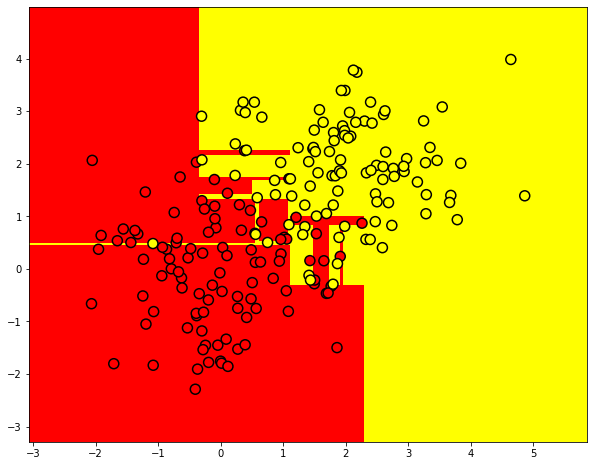

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=17)
clf_tree.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)

Основные способы борьбы с переобучением в случае деревьев решений:

* искусственное ограничение глубины или минимального числа объектов в листе: построение дерева просто в какой-то момент прекращается;
* стрижка дерева

### Класс DecisionTreeClassifier в Scikit-learn

Основные параметры класса sklearn.tree.DecisionTreeClassifier:

* **max_depth** – максимальная глубина дерева
* **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при
  большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех
  признаков)
* **min_samples_leaf** – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он
  равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации.

## Скажи мне, кто твой друг, и я скажу тебе, кто ты: метод ближайших соседей (kNN)

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

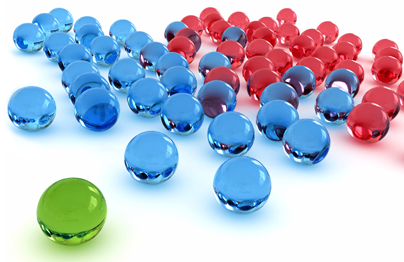

Согласно методу ближайших соседей, тестовый пример (зеленый шарик) будет отнесен к классу "синие", а не "красные".

Например, если не знаешь, какой тип товара указать в объявлении для Bluetooth-гарнитуры, можешь найти 5 похожих гарнитур, и если 4 из них отнесены к категории "Аксессуары", и только один — к категории "Техника", то здравый смысл подскажет для своего объявления тоже указать категорию "Аксессуары".

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки
* Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей


Под задачу регрессии метод адаптируется довольно легко – на 3 шаге возвращается не метка, а число – среднее (или медианное) значение целевого признака среди соседей.


Примечательное свойство такого подхода – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при наличии обучающих примеров, никакая модель не строится. В этом отличие, например, от ранее рассмотренного дерева решений, где сначала на основе обучающей выборки строится дерево, а потом относительно быстро происходит классификация тестовых примеров.


Стоит отметить, что метод ближайших соседей – хорошо изученный подход (в машинном обучении, эконометрике и статистике больше известно, наверное, только про линейную регрессию). Для метода ближайших соседей существует немало важных теорем, утверждающих, что на "бесконечных" выборках это оптимальный метод классификации. Авторы классической книги "The Elements of Statistical Learning" считают kNN теоретически идеальным алгоритмом, применимость которого просто ограничена вычислительными возможностями и проклятием размерностей.

Метод ближайших соседей в реальных задачах

* В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
* В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
* Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди ближайших соседей человека, которому хотим сделать рекомендацию;
* На практике для больших выборок часто пользуются приближенными методами поиска ближайших соседей. Вот лекция Артема Бабенко про эффективные алгоритмы поиска ближайших соседей среди миллиардов объектов в пространствах высокой размерности (поиск по картинкам). Также известны открытые библиотеки, в которых реализованы такие алгоритмы, спасибо компании Spotify за ее библиотеку Annoy.



Качество классификации/регрессии методом ближайших соседей зависит от нескольких параметров:


* число соседей
* метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")


### Класс KNeighborsClassifier в Scikit-learn


Основные параметры класса sklearn.neighbors.KNeighborsClassifier:


* weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
* algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
* leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
* metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие


## Кросс-валидация и выбор параметров модели

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.

Чаще всего это делается одним из 2 способов:

* отложенная выборка (held-out/hold-out set). При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке.
* кросс-валидация (cross-validation, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация

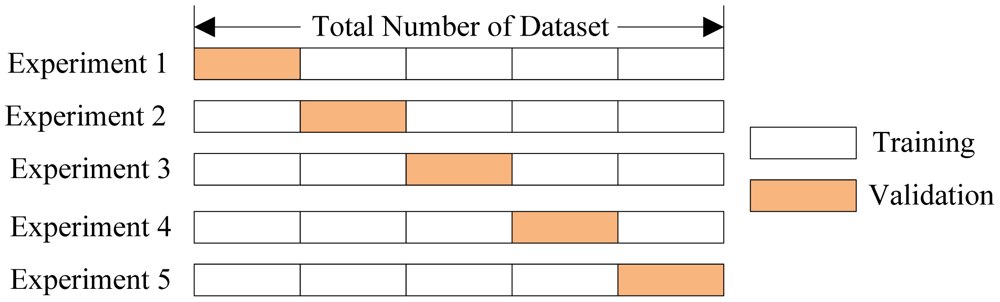

Тут модель обучается $K$ раз на разных ($K-1$) подвыборках исходной выборки (белый цвет), а проверяется на одной подвыборке (каждый раз на разной, оранжевый цвет).
Получаются $K$ оценок качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регрессии на кросс-валидации.


Кросс-валидация дает лучшую по сравнению с отложенной выборкой оценку качества модели на новых данных. Но кросс-валидация вычислительно дорогостоящая, если данных много.

## Хватит разговоров, вернемся к утопающим.
(Пример применения knn и desicion tree на задаче с Титаником)

In [18]:
df = pd.read_csv('prepared_data.csv')

In [19]:
df = df.dropna()

In [20]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives,Survived
0,3,male,22.0,1,0,7.2500,s,mr,braund,a5,21171,1,0.0
1,1,female,38.0,1,0,71.2833,c,mrs,cumings,pc,17599,1,1.0
2,3,female,26.0,0,0,7.9250,s,miss,heikkinen,stono2,3101279,0,1.0
3,1,female,35.0,1,0,53.1000,s,mrs,futrelle,NoPre,113803,1,1.0
4,3,male,35.0,0,0,8.0500,s,mr,allen,NoPre,373450,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,s,rev,montvila,NoPre,211535,0,0.0
887,1,female,19.0,0,0,30.0000,s,miss,graham,NoPre,112050,0,1.0
888,3,female,24.0,1,2,23.4500,s,miss,johnston,wc,6607,3,0.0
889,1,male,26.0,0,0,30.0000,c,mr,behr,NoPre,111369,0,1.0


Кодируем строковые признаки (DecisionTreeClassificator работает исключительно с числовыми признаками, но целевой признак может быть как строкой, так и числом. На самом деле, он должен сам автоматически конвертировать все признаки в numpy-евый float32, но иногда он дурак, и приходится это делать вручную)

In [21]:
df['Sex'] = pd.factorize(df['Sex'])[0]
df['Embarked'] = pd.factorize(df['Embarked'])[0]
df['Name_Prefix'] = pd.factorize(df['Name_Prefix'])[0]
df['TicketPre'] = pd.factorize(df['TicketPre'])[0]
df['TicketNum_Groups'] = pd.factorize(df['TicketNum_Groups'])[0]
df['Lastname'] = pd.factorize(df['Lastname'])[0]
# df['Survived'] = df['Survived'].astype('int')

Цепляем целевой признак в отдельную переменную и дропаем его из датафрема, на котором будем обучать.

In [ ]:
y = df['Survived']
df.drop(['Survived'], axis=1, inplace=True)

In [22]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives
0,3,0,22.0,1,0,7.2500,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,1,1,1,1
2,3,1,26.0,0,0,7.9250,0,2,2,2,2,0
3,1,1,35.0,1,0,53.1000,0,1,3,3,3,1
4,3,0,35.0,0,0,8.0500,0,0,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,5,664,3,440,0
887,1,1,19.0,0,0,30.0000,0,2,233,3,370,0
888,3,1,24.0,1,2,23.4500,0,2,604,11,417,3
889,1,0,26.0,0,0,30.0000,1,0,665,3,441,0


Инициализируем объекты классов моделей-классификаторов DecisionTreeClassifier и kNN из sklearn. Указываем какие-нибудь гиперпараметры, после чего обучаем их на трейновой выборке посредством метода **fit**.

In [23]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Проводим валидацию на отложенной выборке, фиксируем прибыль (значение метрики accuracy).

In [24]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.77

knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred) # 0.65

0.6567164179104478

## GridSearchCV (тюнинг гиперпараметров)

GridSearchCV - функция, вмещающая в себя алгоритм поиска наиболее предпочтительных значений гиперпараметров, также используя при этом кросс-валидацию к выборкам, которые посылаются в эту функцию в качестве аргументов. Помимо этого, при определении объекта класса GridSearchCV в качестве аргуметов отправляется модель, параметры которой нужно вычислить, собственно параметры этой модели (см. пример ниже), параметр кросс-валидации (число, определяющее количество частей, на которые нужно делить выборку), а также количество количество используемых для работы алгоритма ядер (n_jobs).

Есть ещё параметр verbose. Verbose — это общий термин программирования, определяемый как "создание большого количества выходных данных лога (журнала, ватевер)". Вы можете думать об этом как о том, чтобы попросить программу «рассказать мне все о том, что вы делаете все время». Просто установите его в true и посмотрите, что произойдет.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

tree_grid.fit(X_train, y_train)

Смотрим, какие параметры являются самыми лучшими, а также получаем значение метрики accuracy при кросс-валидации. После этого смотрим accuracy на отложенной выборке, используя нашу только что обученную модель

In [26]:
print("best params: ", tree_grid.best_params_)
print("best score: ", tree_grid.best_score_)
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

best params:  {'max_depth': 5, 'max_features': 5}
best score:  0.8394838709677419


0.7835820895522388

Осуществляем всё тоже самое, только уже для kNN.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=5, n_jobs=-1,
                        verbose=True)

knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             n_jobs=-1, param_grid={'knn__n_neighbors': range(1, 10)},
             verbose=True)

In [28]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 8}, 0.8330193548387097)

In [29]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.7723880597014925